In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Import all the dependecies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

**ABOUT THE DATASET**

The Credit Card Fraud dataset consists of 1,000,000 data points and consists of features and target variables of following types:
* Distance from home: The location of fraudulent transcation from home
* Distance from last transaction: The location of fraudulent transaction from last transaction
* Ratio to media purchase price: Ratio of purchased price transaction to median purchase price
* Repeat retailer: Is the fraudulent transaction with the same retailer?
* Used chip: Is the fraudulent transaction done with credit card?
* Used PIN number: Is the fraudulent transaction done with PIN card of credit card?
* Online Order: Is the fraudulent transation online?
* Fraud: Is the transaction fraudulent or legit? [TARGET VARIABLE]
    * **0 == Legit transaction**
    * **1 == Fraudulent transaction**

**DATASET EXPLORATION**

Here, we will check for the certain features of the dataset and decide the course of action. 

* Explore the status of the dataset
* Check for missing values in the data
* Determine the number of features and target variables 
* Check if the classes are imbalanced 

In [3]:
# Load the dataset
# load_data=pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')
load_data=pd.read_csv('card_transdata.csv')

In [4]:
#Print the shape of the dataset
print('The shape of the data set is:',load_data.shape)
print('\n---------------------------------------------\n')

#Check for missing values
print('Checking for missing values: \n')
print(pd.isnull(load_data).sum())
print('\n---------------------------------------------\n')

#Load the statistics for the dataset
print(load_data.describe())
print('\n---------------------------------------------\n')

#Load the info for the dataset
print(load_data.info())
print('\n---------------------------------------------\n')

#Checking if the class is balanced
print(load_data['fraud'].value_counts())
print('\n---------------------------------------------\n')


The shape of the data set is: (1000000, 8)

---------------------------------------------

Checking for missing values: 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

---------------------------------------------

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                

**REMARKS**
* The dataset contains 10,00,000 data points.
* There are 7 features and 1 target with two classes. 
* The class is clearly imbalanced which needs to resolved before procedding ahead.
* To resolve the issue of class imbalance, we will resample the orignial datasets and only select 10,000 datapoints from the original data set.

**2. RESAMPLING THE ORIGINAL DATASET**

In [5]:
#No fraud (class == 0) meaning legit transactions
#Fraud (class == 1) meaning fraudulent transactions

#Creating new data frames for No fraud and Fraud cases
no_fraud=load_data[load_data.fraud == 0]
fraud=load_data[load_data.fraud == 1]

#Resampling the original dataset with 10,000 datapoints
no_fraud_resample=no_fraud.sample(n=5000)
fraud_resample=fraud.sample(n=5000)

#Creating new dataset consisting of equal class occurence 
data=pd.concat([no_fraud_resample,fraud_resample],axis=0)

**3. PREPROCESSING THE DATASET**

In [6]:
#Creating dataframe for target
target=data['fraud']

#Creating dataframe for features
features=data.drop(columns=['fraud'],axis=1)

In [7]:
#Splitting the dataset
train_features,test_features,train_labels,test_labels = train_test_split(features,target,stratify=target,shuffle=True,random_state=43)

print('The shape of feature training set is:',train_features.shape)
print('The shape of labels training set is:',train_labels.shape)
print('The shape of feature testing set is:',test_features.shape)
print('The shape of labels testing set is:',test_labels.shape)

The shape of feature training set is: (7500, 7)
The shape of labels training set is: (7500,)
The shape of feature testing set is: (2500, 7)
The shape of labels testing set is: (2500,)


In [8]:
#Standardising the dataset
scale=MinMaxScaler().fit(train_features)
train_features_scaled=scale.transform(train_features)
test_features_scaled=scale.transform(test_features)

In [9]:
#Creating empty list to store model evaluation values
data_all=[]

**4. MODEL TRAINING AND EVALUATION**

Using three models for classification of fraudulent and non-fraudulent transactions:
* SVM
* Logistic Regression
* Random Forest 

Each model has be hypertuned and there is no baseline model. 

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Train acc: 97.92 %
Test acc: 97.8 %
Best C: 100
Best gamma: 10
Best kernel: rbf


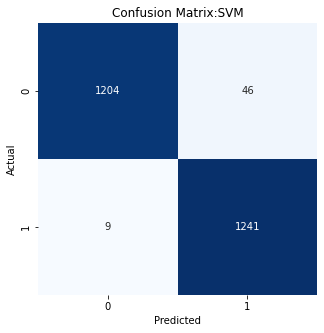

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      1250
         1.0       0.96      0.99      0.98      1250

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



In [10]:
m='SVM'
model= SVC()
param_svm={
    "C":[100,10,1,0.1],
    "gamma": [10,1,0.1,0.001],
    "kernel": ['rbf']
    }

random_svm=RandomizedSearchCV(estimator=model, param_distributions=param_svm, n_iter = 15 , scoring='accuracy', cv = 10, verbose=2, n_jobs=-1,random_state=43)
random_svm.fit(train_features_scaled,train_labels)

model=random_svm.best_estimator_
crossval = cross_val_score(model,train_features_scaled,train_labels,cv=5,scoring='accuracy')
scores = np.mean(crossval)

test_pred=model.predict(test_features_scaled)
test_recall = recall_score(test_labels, test_pred, pos_label=1)
fpr, tpr, thresholds = roc_curve(test_labels, test_pred, pos_label=1)
test_auc = auc(fpr, tpr)

print('Train acc:',round(scores*100,2),'%')
print('Test acc:',round(accuracy_score(test_labels,test_pred)*100,2),'%')
print('Best C:',random_svm.best_estimator_.get_params()['C'])
print('Best gamma:',random_svm.best_estimator_.get_params()['gamma'])
print('Best kernel:',random_svm.best_estimator_.get_params()['kernel']) 

test_pred=model.predict(test_features_scaled)
cm = confusion_matrix(test_labels, test_pred)
clr = classification_report(test_labels, test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix:SVM")
plt.show()
print("Classification Report:\n----------------------\n", clr)

if accuracy_score(test_labels,test_pred)-scores <1:
    result_model='Good Model'
    data_all.append([m,scores,accuracy_score(test_labels,test_pred),test_recall,test_auc,result_model])
else:
    result_model='Failed'
    ddata_all.append([m,scores,accuracy_score(test_labels,test_pred),test_recall,test_auc,result_model])

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Train acc: 93.52 %
Test acc: 93.44 %
Best solver: newton-cg
Best C: 100
Best penalty: l2


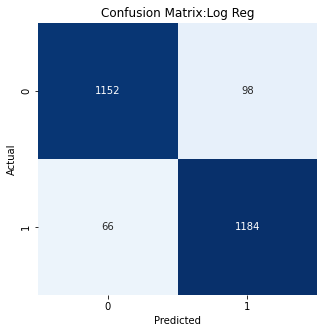

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      1250
         1.0       0.92      0.95      0.94      1250

    accuracy                           0.93      2500
   macro avg       0.93      0.93      0.93      2500
weighted avg       0.93      0.93      0.93      2500



In [11]:
m='Logistic Regression'
model= LogisticRegression(max_iter=1000)
param_lr={
    "solver": ['newton-cg','lbfgs','liblinear'],
    "C":[100, 10, 1.0, 0.1, 0.01],
    "penalty":['l2']
}
random_lr=RandomizedSearchCV(estimator=model, param_distributions=param_lr, n_iter = 15 , scoring='accuracy', cv = 10, verbose=2, n_jobs=-1,random_state=43)
random_lr.fit(train_features_scaled,train_labels)
model=random_lr.best_estimator_
crossval = cross_val_score(model,train_features_scaled,train_labels,cv=5,scoring='accuracy')
scores = np.mean(crossval)

test_pred=model.predict(test_features_scaled)
test_recall = recall_score(test_labels, test_pred, pos_label=1)
fpr,tpr,thresholds = roc_curve(test_labels, test_pred, pos_label=1)
test_auc = auc(fpr,tpr)

print('Train acc:',round(scores*100,2),'%')
print('Test acc:',round(accuracy_score(test_labels,test_pred)*100,2),'%')
print('Best solver:',random_lr.best_estimator_.get_params()['solver'])
print('Best C:',random_lr.best_estimator_.get_params()['C'])
print('Best penalty:',random_lr.best_estimator_.get_params()['penalty'])

test_pred=model.predict(test_features_scaled)
cm = confusion_matrix(test_labels, test_pred)
clr = classification_report(test_labels, test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix:Log Reg")
plt.show()
print("Classification Report:\n----------------------\n", clr)

if accuracy_score(test_labels,test_pred)-scores <1:
    result_model='Good Model'
    data_all.append([m,scores,accuracy_score(test_labels,test_pred),test_recall,test_auc,result_model])
else:
    result_model='Failed'
    data_all.append([m,scores,accuracy_score(test_labels,test_pred),test_recall,test_auc,result_model])

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Train acc: 99.83 %
Test acc: 99.88 %
Best n_estimators: 8
Best max_features: 6
Best max_depth: 9


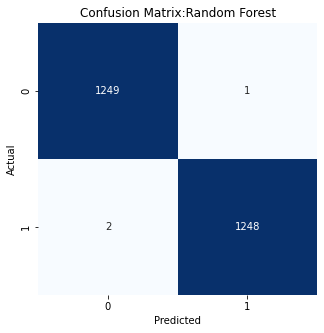

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1250
         1.0       1.00      1.00      1.00      1250

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [12]:
m='Random Forest'
model=RandomForestClassifier()
param_rf={
    "n_estimators":range(2,15,2),
    "max_features":range(1,7),
    "max_depth":range(1,10)
}
random_rf=RandomizedSearchCV(estimator=model, param_distributions=param_rf, n_iter = 15, cv = 10,scoring='accuracy', verbose=2, n_jobs=-1,random_state=43)
random_rf.fit(train_features,train_labels)
model=random_rf.best_estimator_
crossval = cross_val_score(model,train_features,train_labels,cv=5,scoring='accuracy')
scores = np.mean(crossval)

test_pred=model.predict(test_features)
test_recall = recall_score(test_labels, test_pred, pos_label=1)
fpr, tpr, thresholds = roc_curve(test_labels, test_pred, pos_label=1)
test_auc = auc(fpr,tpr)

print('Train acc:',round(scores*100,2),'%')
print('Test acc:',round(accuracy_score(test_labels,test_pred)*100,2),'%')
print('Best n_estimators:',random_rf.best_estimator_.get_params()['n_estimators'])
print('Best max_features:',random_rf.best_estimator_.get_params()['max_features'])
print('Best max_depth:',random_rf.best_estimator_.get_params()['max_depth'])

test_pred=model.predict(test_features)
cm = confusion_matrix(test_labels, test_pred)
clr = classification_report(test_labels, test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix:Random Forest")
plt.show()
print("Classification Report:\n----------------------\n", clr)

if accuracy_score(test_labels,test_pred)-scores <1:
    result_model='Good Model'
    data_all.append([m,scores,accuracy_score(test_labels,test_pred),test_recall,test_auc,result_model])
else:
    result_model='Failed'
    data_all.append([m,scores,accuracy_score(test_labels,test_pred),test_recall,test_auc,result_model])

In [13]:
models=['SVM','LogReg','Random Forest']
pd_scores=pd.DataFrame(data_all,columns=['model','train score','test score','test recall','test_auc','Remark'])
print(pd_scores)

                 model  train score  test score  test recall  test_auc  \
0                  SVM     0.979200      0.9780       0.9928    0.9780   
1  Logistic Regression     0.935200      0.9344       0.9472    0.9344   
2        Random Forest     0.998267      0.9988       0.9984    0.9988   

       Remark  
0  Good Model  
1  Good Model  
2  Good Model  
